In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
import re
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
#import the data
df = pd.read_csv("BabyCenter_ttc_q.csv")
len(df)

799

In [3]:
def filter_str(desstr, restr=' '):
    # remove characters except Chinese, English and numbers.
    res = re.compile("[^\\u4e00-\\u9fa5^a-z^A-Z^0-9]")
    return res.sub(restr, desstr)

In [4]:
#set stop words
stop_words = set(stopwords.words('english'))
len(stop_words)

cus_words = set()

w = open("stopwords.txt")# import local stop word lists
line = w.readline()
while line:
    line = line.replace('\n','')
    cus_words.add(line)
    line = w.readline()
len(cus_words)

stop_words = stop_words | set(cus_words)#merge cus_word and nltk.corpus.stopwords
len(stop_words)

918

In [5]:
#Clean the data

text = []
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(df)):
    lst = str(df.Content[i])
    lst = lst.lower()
    lst = tokenizer.tokenize(lst) 
    text.append(lst)
# Remove numbers, but not words that contain numbers. Words like "3weeks" are remained.
text = [[item for item in lst if not item.isnumeric()] for lst in text]
# Remove words that are only one character.
text = [[item for item in lst if len(item) > 1] for lst in text]
# Remove words that are stop_words.
text = [[item for item in lst if item not in stop_words]for lst in text]

In [6]:
# Lemmatize all words in documents.
lemmatizer = WordNetLemmatizer()
text = [[lemmatizer.lemmatize(item) for item in lst] for lst in text]

In [7]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(text)

# Get corpus.
corpus = [dictionary.doc2bow(lst) for lst in text] 

In [8]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2996
Number of documents: 799


In [12]:
for i in range(1,12):
    print('目前的topic个数:{}'.format(i))
    print('目前的数据量:{}'.format(len(text)))
    temp = 'lda_{}_{}'.format(i,len(text))
    lda = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, passes=20) #从log上看，20次足够了。
    file_path = './lda_ttc_q_20/{}.model'.format(temp) #这句话的意思是“将模型训练结果放进根目录下名叫’lda_ttc_q_20‘的文件夹内。
    print(file_path)
    lda.save(file_path)
    print('------------------')

目前的topic个数:1
目前的数据量:799
./lda_ttc_q_20/lda_1_799.model
------------------
目前的topic个数:2
目前的数据量:799
./lda_ttc_q_20/lda_2_799.model
------------------
目前的topic个数:3
目前的数据量:799
./lda_ttc_q_20/lda_3_799.model
------------------
目前的topic个数:4
目前的数据量:799
./lda_ttc_q_20/lda_4_799.model
------------------
目前的topic个数:5
目前的数据量:799
./lda_ttc_q_20/lda_5_799.model
------------------
目前的topic个数:6
目前的数据量:799
./lda_ttc_q_20/lda_6_799.model
------------------
目前的topic个数:7
目前的数据量:799
./lda_ttc_q_20/lda_7_799.model
------------------
目前的topic个数:8
目前的数据量:799
./lda_ttc_q_20/lda_8_799.model
------------------
目前的topic个数:9
目前的数据量:799
./lda_ttc_q_20/lda_9_799.model
------------------
目前的topic个数:10
目前的数据量:799
./lda_ttc_q_20/lda_10_799.model
------------------
目前的topic个数:11
目前的数据量:799
./lda_ttc_q_20/lda_11_799.model
------------------


-6.7382430338984305
-6.7642078098640885
-6.788467399420577
-6.818594150399599
-6.8463096935011
-6.861894794844836
-6.876151583476572
-6.909508154912868
-6.914117979659594
-6.929585982825813
-6.946576338292595


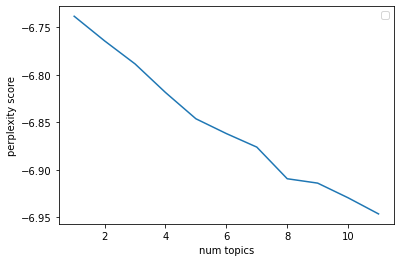

In [13]:
def perplexity_visible_model(self, topic_num, data_num):
        '''
        @description: 绘制困惑度-主题数目曲线
        '''
        corpus = self
        x_list = []
        y_list = []
        for i in range(1,topic_num):
            model_name = './lda_ttc_q_20/lda_{}_{}.model'.format(i, data_num) #这句话的意思是调用’lda_ttc_q_20‘文件夹内的某个模型。
            try:
                lda = models.ldamodel.LdaModel.load(model_name)
                perplexity = lda.log_perplexity(corpus)
                print(perplexity)
                x_list.append(i)
                y_list.append(perplexity)
            except:
                print('没有这个模型:{}'.format(model_name))
        plt.xlabel('num topics')
        plt.ylabel('perplexity score')
        plt.legend(('perplexity_values'), loc='best')
        plt.plot(x_list,y_list)
        plt.show()
perplexity_visible_model(corpus,12,799)

0.3674076560659661
0.36465668823620223
0.5456841703771322
0.4545473868348029
0.4817067871634892
0.3844592659596884
0.4157565711303131
0.42456581284263706
0.4151709614416457
0.4385341324165717
0.3818281171674373


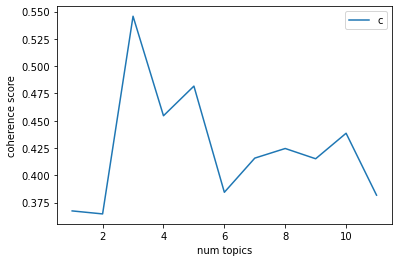

In [14]:
def visible_model(text, topic_num, data_num):
        '''
        @description: 可视化模型
        @param :topic_num:主题的数量
        @param :data_num:数据的量
        @return: 可视化lda模型
        '''
        text = text
        x_list = []
        y_list = []
        for i in range(1,topic_num):
            model_name = './lda_ttc_q_20/lda_{}_{}.model'.format(i, data_num)
            try:
                lda = models.ldamodel.LdaModel.load(model_name)
                cv_tmp = CoherenceModel(model=lda, texts=text, dictionary = dictionary, coherence='c_v')
                coherence = cv_tmp.get_coherence()
                print(coherence)
                x_list.append(i)
                y_list.append(coherence)
            except:
                print('没有这个模型:{}'.format(model_name))
        plt.plot(x_list, y_list)
        plt.xlabel('num topics')
        plt.ylabel('coherence score')
        plt.legend(('coherence_values'), loc='best')
        plt.show()
visible_model(text,12,799)

In [15]:
def visible(self, topic_num, data_num):
    corpus = self 
    model_name = './lda_ttc_q_20/lda_{}_{}.model'.format(topic_num, data_num)
    lda = models.ldamodel.LdaModel.load(model_name)
    vis_data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
    return pyLDAvis.display(vis_data)

In [16]:
visible(corpus,3,799)

In [17]:
#输出话题为3的关键词及概率分布
model_name = './lda_ttc_q_20/lda_{}_{}.model'.format(3, 799)
lda = models.ldamodel.LdaModel.load(model_name)
topic_table = pd.DataFrame(lda.show_topics(), columns=['Topic Number','KTG'])

In [18]:
def clean_topic_table(LDA_Model,top_terms):

    complete = []
    KTG_list = []

    list_of_topics = [i for i in range(0,LDA_Model.num_topics)]

    for i in range (0, LDA_Model.num_topics):
        clean_KTG = ", ".join([word for word, prop in LDA_Model.show_topic(i,topn=top_terms)])
        KTG_list.append(clean_KTG)

    final_list = list(zip(list_of_topics,KTG_list))
    return pd.DataFrame(final_list, columns=['Topic Number','KTG'])

In [20]:
KTG_List = clean_topic_table(lda,40)
KTG_List.to_csv('lda_ttc_q_3.csv')